# Lab 5 Network Models
## Due: Midnight, March 23rd
In this lab, we will
1. **explore the properties of real-world social networks**
2. **learn how to simulate random graph, small world model graph and preferrential attachment model graph**
3. **explore the properties of the simulated graphs**


## Save Your Notebook! 
- Click on File (upper left corner), Select “Save and Checkpoint”.
- Important: You may loose your modification to a notebook if you do not Save it explicitly.
- Advice: Save and Checkpoint often.  


## Submission
- Please follow the instructions and finish the exercises.
- After you finish the lab, please Click on File, Select “Download as”, Choose Notebook (.ipynb)
- After download is complete, Click on File, Select “Download as” again, Choose PDF via Latex (.pdf)
- Submit both the Notebook file and the PDF File as your submission for Lab 5.
- **Fill in the report and submit it to Canvas**

# 1. Propertities of Real World Social Networks
In the class, we discussed three key measurements of real-world social networks, including degree distribution, clustering coefficients and average shortest path length. Since it takes a long time to calcualte average shortest path length for large graphs, in this lab, we will mainly focus on degree distribution and clustering coefficients.

In [1]:
import networkx as nx
import matplotlib.pyplot as plt
import collections

/home/nbuser/anaconda3_501/lib/python3.6/site-packages/matplotlib/font_manager.py:229: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  'Matplotlib is building the font cache using fc-list. '


## 1.1 Load the graph
Please download the file RO_edges.csv from Canvas and upload to Azure. The file contains the edgelist of a Friendships networks of users from a European country on music streaming service Deezer. Each line of the file is one edge of the network in the format of *Source_node,Target_node*. It is time consuing to visualize a large graph. Thus, we will not visualize it.

In [2]:
# Please load the graph
G = nx.read_edgelist(path="RO_edges.csv", delimiter=',', nodetype=int)
num_edges = G.number_of_edges()
num_nodes = G.number_of_nodes()
print('number of nodes: {}, number of edges: {}'.format(num_nodes, num_edges))

number of nodes: 41773, number of edges: 125826


## 1.2 Degree Distribtuion

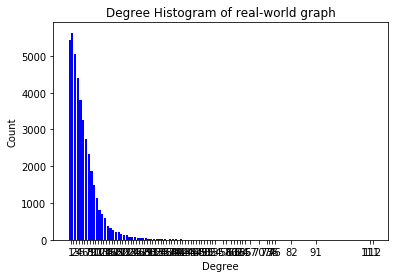

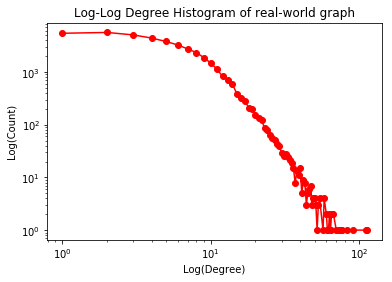

In [3]:
def plot_degree_histogram(G, title_of_figure):
    """
    This function plot the degree histogram of a graph G
    :param G: the input graph
    :param title_of_figure: the title of the figure
    :return: 
    """
    degree_sequence = sorted([d for n, d in G.degree()], reverse=True)  # degree sequence
    degreeCount = collections.Counter(degree_sequence)
    deg, cnt = zip(*degreeCount.items())
    fig, ax = plt.subplots()
    plt.bar(deg, cnt, width=0.80, color='b')
    plt.title("Degree Histogram of "+title_of_figure)
    plt.ylabel("Count")
    plt.xlabel("Degree")
    ax.set_xticks([d + 0.4 for d in deg])
    ax.set_xticklabels(deg)
    plt.show(block=False)

    ## log-log scale
    fig, ax = plt.subplots()
    plt.loglog(deg, cnt,'ro-')
    plt.title("Log-Log Degree Histogram of "+title_of_figure)
    plt.ylabel("Log(Count)")
    plt.xlabel("Log(Degree)")
    plt.show(block=False)

plot_degree_histogram(G, 'real-world graph')

## 1.3 Average Clustering Coefficients

In [4]:
print('average clustering coefficients is {}'.format(nx.average_clustering(G)))

average clustering coefficients is 0.0912123373083256


# 2. Random Graph
We will gerante a random graph with the same number of nodes and similar number of edges with the real-world graphd and analyze its degree distribution and clustering coefficients.

## 2.1 Generate A Random Graph
Assume the real-world graph has n nodes and m edges. To simulate a random graph of n nodes and approximately m edges with G(n,p) model, we set
\begin{equation}
    p = \frac{m}{n \choose 2}
\end{equation}
where ${n \choose 2} = \frac{n\cdot (n-1)}{2}$. With p defined above, we can use the nx.fast_gnp_random_graph(n, p) to generate a random graph with n nodes and approximately m edges. For details of fast_gnp_random_graph(n, p, seed=None, directed=False), please visit: https://pelegm-networkx.readthedocs.io/en/latest/reference/generated/networkx.generators.random_graphs.fast_gnp_random_graph.html

## Exervise 1.
Please generate a random graph with the same number of nodes and approxmatly the same number number of edges as the real-graph in Section 1.1.

In [5]:
# TODO: please fill in following code
c = (num_nodes * (num_nodes - 1)) / 2
p = num_edges / c # probability of forming an edge, use the above equation to calculate
gnp_graph = nx.fast_gnp_random_graph(n=41773, p=p)
print('number of nodes: {}, number of edges: {}'.format(gnp_graph.number_of_nodes(), gnp_graph.number_of_edges()))

number of nodes: 41773, number of edges: 125943


## 2.2 Degree Distribution of Random Graph

## Exercise 2
Please call plot_degree_histogram to calculate the degree distribution

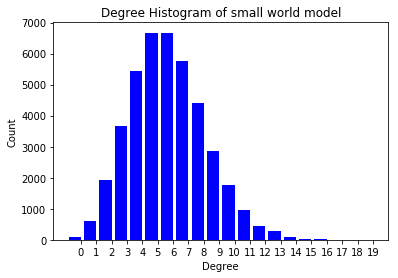

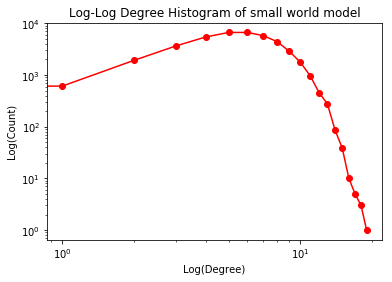

In [8]:
# TODO: call the function to plot the degree distribution
plot_degree_histogram(gnp_graph, 'small world model')

## 2.3 Clustering Coefficients

In [9]:
print('average clustering coefficients is {}'.format(nx.average_clustering(gnp_graph)))

average clustering coefficients is 0.00017494176041563095


# Small-World Model
We will gerante a small world model with the same number of nodes, similar number of edges and similar clustering coefficients with the real-world graph in Section 1.1. We will then its degree distribution and clustering coefficients. The function we use is nx.watts_strogatz_graph(n, k, p), where 
- n: The number of nodes,
- k:Each node is connected to k nearest neighbors in ring topology (degree of the lattice), 
- p: The probability of rewiring each edge 

For more details, please refer to:  in https://networkx.github.io/documentation/networkx-1.9/reference/generated/networkx.generators.random_graphs.watts_strogatz_graph.html.


## Exercise 3
Please fill in the following code to generate a small world model with the same number of nodes, similar number of edges and similar clustering coefficients with the real-world graph in Section 1.1. Obviously, we should set n as the number of nodes of the real graph in Section 1.1. k should be an integer close to the average degree of the real-world graph. For simplicity, we set p = 0.45

In [30]:
# TODO: please fill in the following codes
average_degree = 2 * (125826 / 41773)
small_world = nx.watts_strogatz_graph(n=41773, k=round(average_degree), p=0.45)
print('number of nodes: {}, number of edges: {}'.format(small_world.number_of_nodes(), small_world.number_of_edges()))

number of nodes: 41773, number of edges: 125319


## Exercise 4: Degree Distribution of Small World Model

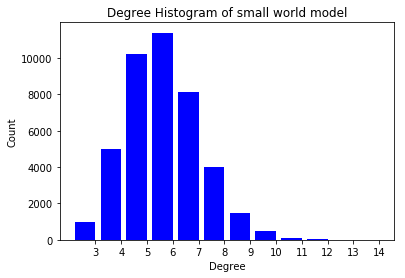

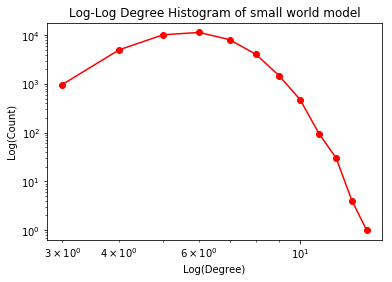

In [31]:
# TODO: Please fill in the following codes
plot_degree_histogram(small_world, 'small world model')

## Exervise 5: Clustering Coefficients of Small World Model

In [32]:
# TODO: please calcualte the average clustering coefficient of the small world model
print('average clustering coefficients is {}'.format(nx.average_clustering(small_world)))

average clustering coefficients is 0.10439783393724508


# 4 Preferrential Attachment Model
We will generate a scale-free graph with the same number of nodes and simialr edges with the real-world graph and analyze its degree distribution.

## 4.1 Generate Scale-Free Graph with Preferrential Attachment Model
Given a real-world network with n nodes and k edges, to simulate a preferential attachment model graph with n nodes and approximately k edges, we can set each new node make k connections with 
\begin{equation}
    m \approx \frac{k}{n}
\end{equation}
With m set as $\frac{k}{n}$, we can call barabasi_albert_graph(n, m, seed=None) to generate a scale-free graph. For more details of barabasi_albert_graph(n, m, seed=None), please visit: https://networkx.github.io/documentation/networkx-1.9/reference/generated/networkx.generators.random_graphs.barabasi_albert_graph.html

## Exercise 6: Preferrential Attachment Model
Please call nx.barabasi_albert_graph to generate a small world model with the same number of nodes and similar number of edges with the real-world graph in Section 1.1.

In [27]:
preferential_attachment = nx.barabasi_albert_graph(n=41773, m=3)
print('number of nodes: {}, number of edges: {}'.format(preferential_attachment.number_of_nodes(), preferential_attachment.number_of_edges()))

number of nodes: 41773, number of edges: 125310


## 4.2 Degree Distribution of Preferrential Attachment Model

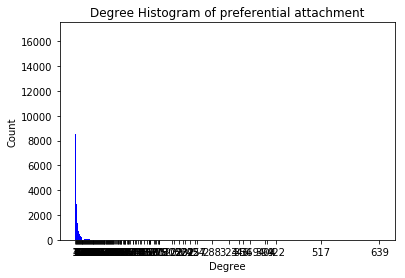

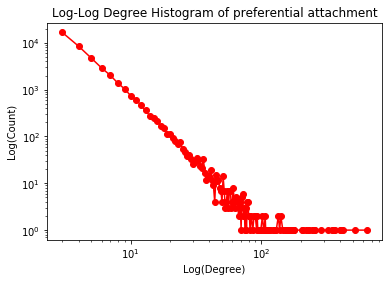

In [28]:
# call the function to plot the degree distribution
plot_degree_histogram(preferential_attachment, 'preferential attachment')

## Clustering Coefficients of Preferrential Attachment Model

In [29]:
print('average clustering coefficients is {}'.format(nx.average_clustering(preferential_attachment)))

average clustering coefficients is 0.0018909908328565408


# Fill In Report and Submit
Now you have analyzed the real-world graph and simulated three graphs with network models, please fill in the Lab5_Network_Models_Report. Please submit Lab5_Network_Models_Report, this ipynb file and a pdf version to Canvas.